In [765]:
import pandas as pd 
import os 
#tv_data_set_path = '\Users\Asus\Downloads\tv_data_set.csv'
df = pd.read_csv('tv_data_set.csv', index_col = False)


In [766]:
#to remove unnamed cols
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()
df.drop(['id'],axis=1,inplace=True)

In [767]:
df.shape

(321, 75)

In [768]:
df.isnull().sum()

image_url                          0
Brand                              0
Manufacturer                       0
Model                             22
Model Year                         3
                                ... 
Speakers Maximum Output Power    316
Speaker Connectivity             317
Contains Liquid Contents         319
Item part number                 315
Maximum Memory Supported         320
Length: 75, dtype: int64

In [769]:
def null_percentage(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
    missing_value_df.reset_index(inplace=True)
    missing_value_df.columns = ['column_name','percent_missing']
    missing_value_df = missing_value_df.sort_values('percent_missing',)
    return missing_value_df

In [770]:
missing_value_df = null_percentage(df)
missing_value_df

,column_name,percent_missing
0,image_url,0.000000
1,Brand,0.000000
2,Manufacturer,0.000000
30,product,0.000000
33,product_url,0.000000
...,...,...
66,Battery Capacity,99.688474
67,Audio Encoding,99.688474
69,Imported By,99.688474
59,Processor Count,99.688474


In [771]:
##considering only the features which has data greater than 70
missing_value_df = missing_value_df[missing_value_df['percent_missing']<70]

In [772]:
required_columns = list(missing_value_df.column_name)

In [773]:

df = df[required_columns]
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.lower()


In [774]:
# df.drop(['manufacturer',], axis=1)
print(df.dtypes)

image_url                                        object
brand                                            object
manufacturer                                     object
product                                          object
product_url                                      object
price                                            object
resolution                                       object
rating                                           object
standing_screen_display_size                     object
display_technology                               object
connector_type                                   object
display_type                                     object
number_of_items                                 float64
operating_system                                 object
mounting_hardware                                object
model_year                                      float64
item_weight                                      object
refresh_rate                                    

In [775]:
df.head()


,image_url,brand,manufacturer,product,product_url,price,resolution,rating,standing_screen_display_size,display_technology,...,batteries,battery_cell_composition,special_features,memory_storage_capacity,image_contrast_ratio,response_time,media_format,includes_rechargable_battery,image_brightness,real_angle_of_view
0,https://m.media-amazon.com/images/I/41Y+SwHCJz...,AmazonBasics,"Veira Electronics Private Limited D-239, SEC-6...",AmazonBasics 139 cm (55 inches) 4K Ultra HD Sm...,https://amazon.in/gp/slredirect/picassoRedirec...,"36,499",3840x2160 Pixels,4.0 out of 5 stars,55 Inches,LED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://images-eu.ssl-images-amazon.com/images...,CROMA,Veira Electronics Pvt.Ltd,Croma 80 cm (32 Inches) HD Ready Certified And...,https://amazon.in/gp/slredirect/picassoRedirec...,"12,490",1366768 Pixels,4.4 out of 5 stars,32 Inches,LED,...,2 AAA batteries required. (included),Alkaline,NaN,8 GB,3000:01,NaN,NaN,NaN,NaN,NaN
2,https://images-eu.ssl-images-amazon.com/images...,Redmi,Redmi,Redmi 80 cm (32 inches) Android 11 Series HD R...,https://amazon.in/Redmi-inches-Ready-L32M6-RA-...,"14,999",1366 x 768 Pixels,4.2 out of 5 stars,32 Inches,LED,...,2 AAA batteries required.,NaN,PatchWall 4 with IMDb Integration | Kids Mode ...,8 GB,NaN,NaN,"AVI, MPEG",NaN,Ultra Bright Screen,178 Degrees
3,https://m.media-amazon.com/images/I/41fVP+e7Cz...,OnePlus,Radiant Appliances and Electronics Pvt. Ltd.,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,https://amazon.in/OnePlus-inches-Ready-Android...,"14,999",1366x768 Pixels,4.2 out of 5 stars,32 Inches,LED,...,2 AAA batteries required.,Alkaline,NaN,NaN,5000:1,NaN,"AVI, DVD, MPEG, WAV, WMA",NaN,High brightness,NaN
4,https://images-eu.ssl-images-amazon.com/images...,MI,DIXON TECHNOLOGIES (INDIA) LIMITED,Mi 108 cm (43 inches) Full HD Android LED TV 4...,https://amazon.in/inches-Full-Android-L43M6-IN...,"22,999",1920x1080 Pixels,4.3 out of 5 stars,43 Inches,LED,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [776]:
default = ['image_url','product','product_url',]


FEATURES_SELECTED_BY_SME = ['price','refresh_rate','display_type','audio_wattage','maximum_operating_distance','brand','resolution','rating',
'standing_screen_display_size','display_technology','item_weight','wattage','supports_bluetooth_technology']

vector_length = len(FEATURES_SELECTED_BY_SME)


ALL_COLUMNS = FEATURES_SELECTED_BY_SME + default
df = df.loc[:,ALL_COLUMNS]

df

,price,refresh_rate,display_type,audio_wattage,maximum_operating_distance,brand,resolution,rating,standing_screen_display_size,display_technology,item_weight,wattage,supports_bluetooth_technology,image_url,product,product_url
0,"36,499",60 Hz,LED,NaN,NaN,AmazonBasics,3840x2160 Pixels,4.0 out of 5 stars,55 Inches,LED,10 kg 300 g,NaN,Yes,https://m.media-amazon.com/images/I/41Y+SwHCJz...,AmazonBasics 139 cm (55 inches) 4K Ultra HD Sm...,https://amazon.in/gp/slredirect/picassoRedirec...
1,"12,490",60 Hz,LED,20 Watts,NaN,CROMA,1366768 Pixels,4.4 out of 5 stars,32 Inches,LED,6 kg 500 g,NaN,NaN,https://images-eu.ssl-images-amazon.com/images...,Croma 80 cm (32 Inches) HD Ready Certified And...,https://amazon.in/gp/slredirect/picassoRedirec...
2,"14,999",60 Hz,A+,20 Watts,8 Feet,Redmi,1366 x 768 Pixels,4.2 out of 5 stars,32 Inches,LED,3 kg 920 g,50 Watts,Yes,https://images-eu.ssl-images-amazon.com/images...,Redmi 80 cm (32 inches) Android 11 Series HD R...,https://amazon.in/Redmi-inches-Ready-L32M6-RA-...
3,"14,999",60 Hz,LED,20 Watts,9 Feet,OnePlus,1366x768 Pixels,4.2 out of 5 stars,32 Inches,LED,3 kg 500 g,20.00,Yes,https://m.media-amazon.com/images/I/41fVP+e7Cz...,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,https://amazon.in/OnePlus-inches-Ready-Android...
4,"22,999",60 Hz,Dynamic Backlight,20 Watts,NaN,MI,1920x1080 Pixels,4.3 out of 5 stars,43 Inches,LED,5 kg 480 g,75 Watts,Yes,https://images-eu.ssl-images-amazon.com/images...,Mi 108 cm (43 inches) Full HD Android LED TV 4...,https://amazon.in/inches-Full-Android-L43M6-IN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,"56,999",60 Hz,A+ Grade,24 Watts,NaN,IFFALCON,3840 x 2160 Pixels,4.3 out of 5 stars,65 Inches,LED,17 kg 300 g,24 Watts,Yes,https://images-eu.ssl-images-amazon.com/images...,iFFALCON 164 cm (65 inches) 4K Ultra HD Certif...,https://amazon.in/iFFALCON-inches-Certified-An...
317,"18,490",50 Hz,IPS,10 Watts,8 Feet,LG,1366x768 Pixels,4.3 out of 5 stars,32 Inches,LED,19 kg 100 g,10.00,No,https://images-eu.ssl-images-amazon.com/images...,LG 80 cms (32 Inches) HD Ready Smart IPS LED T...,https://amazon.in/LG-Inches-Ready-32LM560BPTC-...
318,"10,499",60 Hz,LED,NaN,NaN,Imee,1366768 Pixels,1.0 out of 5 stars,32 Inches,LED,NaN,50 Watts,NaN,https://images-eu.ssl-images-amazon.com/images...,iMee 80cm (32 inch) Elite Series Smart Framele...,https://amazon.in/Elite-Smart-Frameless-Black-...
319,"8,990",60 Hz,A+,20 Watts,9 Feet,Karbonn,1366x768 Pixels,4.4 out of 5 stars,32 Inches,LED,4 kg 400 g,60 Watts,No,https://images-eu.ssl-images-amazon.com/images...,Karbonn 80 cm (32 Inches) Millennium Series HD...,https://amazon.in/gp/slredirect/picassoRedirec...


In [777]:
missing_value_df = null_percentage(df)
missing_value_df

,column_name,percent_missing
0,price,0.000000
5,brand,0.000000
6,resolution,0.000000
13,image_url,0.000000
14,product,0.000000
15,product_url,0.000000
7,rating,0.311526
8,standing_screen_display_size,0.311526
9,display_technology,0.311526
2,display_type,0.623053


In [778]:
import re 
import numpy as np 

def extract_data_before_first_space(string):
    if string is not np.NaN:
        return float(re.split(" +", str(string))[0])
    return string
    
    
def remove_word_from_string(string,word):
    words =string.split(word)
    words = [i.strip() for i in words]
    return ' '.join(words).strip()



def weight_processor(weight_string):
    """
    takes - weight_string
        ex: 1 kg 200 g, 
    returns - weight in kg with no units
        ex: 1.2000
    """
    # can handle, 1 kg 200 g, 1.2 kg 
    pattern1 = r".*(\b\d+).*(\b\d+).*"
    # can handle 1 kg, 2 kg
    pattern2 = r".*(\b\d+).*"

    result_pat1 = re.search(pattern1, weight_string)

    if result_pat1:
        groups = result_pat1.groups()
        kg = float(groups[0])
        gm = float(groups[1])
        return kg + gm / 1000
        # return float(groups[0] + "." + groups[1])
    
    result_pat2 = re.search(pattern2, weight_string)

    if result_pat2:
        groups = result_pat2.groups()
        weight = float(groups[0])
        if weight > 100:
            return weight / 1000
        return float(weight)

In [779]:
def resolution_process(resolution_string):
    if 'x' in resolution_string:
        [i,j] = resolution_string.split('x',2)
        res = float(i)*float(j)
        return(res)
    return None

In [780]:
## preprocessing of columns
df['rating'] = df['rating'].apply(lambda x: extract_data_before_first_space(x))
df['refresh_rate'] = df['refresh_rate'].apply(lambda x: extract_data_before_first_space(x))
df ['audio_wattage'] = df['audio_wattage'].apply(lambda x: extract_data_before_first_space(x))
df ['resolution'] = df['resolution'].apply(lambda x : remove_word_from_string(x,'Pixels'))
df['standing_screen_display_size'] = df['standing_screen_display_size'].apply(extract_data_before_first_space)
df['maximum_operating_distance'] = df['maximum_operating_distance'].apply(extract_data_before_first_space)
df['wattage'] = df['wattage'].apply(extract_data_before_first_space)
df['item_weight'] = df['item_weight'].apply(lambda x: weight_processor(str(x)))
df['resolution'] = df['resolution'].apply(lambda x: resolution_process(str(x)))
df['price'] = df['price'].str.replace(',', '').astype('float')


In [781]:
df

,price,refresh_rate,display_type,audio_wattage,maximum_operating_distance,brand,resolution,rating,standing_screen_display_size,display_technology,item_weight,wattage,supports_bluetooth_technology,image_url,product,product_url
0,36499.0,60.0,LED,NaN,NaN,AmazonBasics,8294400.0,4.0,55.0,LED,10.30,NaN,Yes,https://m.media-amazon.com/images/I/41Y+SwHCJz...,AmazonBasics 139 cm (55 inches) 4K Ultra HD Sm...,https://amazon.in/gp/slredirect/picassoRedirec...
1,12490.0,60.0,LED,20.0,NaN,CROMA,NaN,4.4,32.0,LED,6.50,NaN,NaN,https://images-eu.ssl-images-amazon.com/images...,Croma 80 cm (32 Inches) HD Ready Certified And...,https://amazon.in/gp/slredirect/picassoRedirec...
2,14999.0,60.0,A+,20.0,8.0,Redmi,1049088.0,4.2,32.0,LED,3.92,50.0,Yes,https://images-eu.ssl-images-amazon.com/images...,Redmi 80 cm (32 inches) Android 11 Series HD R...,https://amazon.in/Redmi-inches-Ready-L32M6-RA-...
3,14999.0,60.0,LED,20.0,9.0,OnePlus,1049088.0,4.2,32.0,LED,3.50,20.0,Yes,https://m.media-amazon.com/images/I/41fVP+e7Cz...,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,https://amazon.in/OnePlus-inches-Ready-Android...
4,22999.0,60.0,Dynamic Backlight,20.0,NaN,MI,2073600.0,4.3,43.0,LED,5.48,75.0,Yes,https://images-eu.ssl-images-amazon.com/images...,Mi 108 cm (43 inches) Full HD Android LED TV 4...,https://amazon.in/inches-Full-Android-L43M6-IN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,56999.0,60.0,A+ Grade,24.0,NaN,IFFALCON,8294400.0,4.3,65.0,LED,17.30,24.0,Yes,https://images-eu.ssl-images-amazon.com/images...,iFFALCON 164 cm (65 inches) 4K Ultra HD Certif...,https://amazon.in/iFFALCON-inches-Certified-An...
317,18490.0,50.0,IPS,10.0,8.0,LG,1049088.0,4.3,32.0,LED,19.10,10.0,No,https://images-eu.ssl-images-amazon.com/images...,LG 80 cms (32 Inches) HD Ready Smart IPS LED T...,https://amazon.in/LG-Inches-Ready-32LM560BPTC-...
318,10499.0,60.0,LED,NaN,NaN,Imee,NaN,1.0,32.0,LED,NaN,50.0,NaN,https://images-eu.ssl-images-amazon.com/images...,iMee 80cm (32 inch) Elite Series Smart Framele...,https://amazon.in/Elite-Smart-Frameless-Black-...
319,8990.0,60.0,A+,20.0,9.0,Karbonn,1049088.0,4.4,32.0,LED,4.40,60.0,No,https://images-eu.ssl-images-amazon.com/images...,Karbonn 80 cm (32 Inches) Millennium Series HD...,https://amazon.in/gp/slredirect/picassoRedirec...


In [782]:
df.isnull().sum()

price                              0
refresh_rate                       3
display_type                       2
audio_wattage                     44
maximum_operating_distance       116
brand                              0
resolution                        43
rating                             1
standing_screen_display_size       1
display_technology                 1
item_weight                        3
wattage                           56
supports_bluetooth_technology     44
image_url                          0
product                            0
product_url                        0
dtype: int64

In [783]:
##filling null values 
###better implementing them based on data type

df['refresh_rate'] = df['refresh_rate'].fillna(df['refresh_rate'].median())
df['display_type']= df['display_type'].fillna(df['display_type'].mode()[0])
df['audio_wattage'] = df['audio_wattage'].fillna(df['audio_wattage'].mean())
df['maximum_operating_distance'] = df['maximum_operating_distance'].fillna(df['maximum_operating_distance'].mean())
df['resolution'] = df['resolution'].fillna(df['resolution'].mean())
df['rating'] = df['rating'].fillna(df['rating'].median())
df['standing_screen_display_size'] = df['standing_screen_display_size'].fillna(df['standing_screen_display_size'].mean())
df['display_technology'] = df['display_technology'].fillna(df['display_technology'].mode()[0])
df['wattage'] = df['wattage'].fillna(df['wattage'].median())
df['item_weight'] = df['item_weight'].fillna(df['item_weight'].mean())
df['supports_bluetooth_technology'] = df['supports_bluetooth_technology'].fillna(df['supports_bluetooth_technology'].mode()[0])




df.describe()

In [784]:
df.dtypes

price                            float64
refresh_rate                     float64
display_type                      object
audio_wattage                    float64
maximum_operating_distance       float64
brand                             object
resolution                       float64
rating                           float64
standing_screen_display_size     float64
display_technology                object
item_weight                      float64
wattage                          float64
supports_bluetooth_technology     object
image_url                         object
product                           object
product_url                       object
dtype: object

In [785]:
df_types = df.dtypes.apply(lambda x: x.name).to_dict()  
df_types


{'price': 'float64',
 'refresh_rate': 'float64',
 'display_type': 'object',
 'audio_wattage': 'float64',
 'maximum_operating_distance': 'float64',
 'brand': 'object',
 'resolution': 'float64',
 'rating': 'float64',
 'standing_screen_display_size': 'float64',
 'display_technology': 'object',
 'item_weight': 'float64',
 'wattage': 'float64',
 'supports_bluetooth_technology': 'object',
 'image_url': 'object',
 'product': 'object',
 'product_url': 'object'}

In [786]:
categorical_values = [ i for i in df_types if df_types[i] =='object']
##ask for product information by showing categories and keep the remaining as either boolean if 2 or keep them as ENUM
# columns for product information will be coming from admin 
categorical_values

['display_type',
 'brand',
 'display_technology',
 'supports_bluetooth_technology',
 'image_url',
 'product',
 'product_url']

In [787]:
def categories_enum_or_boolean(df,column):
    return df[column].value_counts().size == 2

In [788]:
###on showing all the columns SME will give us features selected by sme and product information as payload

FEATURES_SELECTED_BY_SME = ['price','refresh_rate','display_type','audio_wattage','maximum_operating_distance','brand','resolution','rating',
'standing_screen_display_size','display_technology','item_weight','wattage','supports_bluetooth_technology']

PRODUCT_INFORMATION = ['image_url','product','product_url']

#seggregating the data type of features
CATEGORICAL_FEATURES = list(set(categorical_values).difference(set(categorical_values)))
print(CATEGORICAL_FEATURES)
BOOLEAN_COLS = []
ENUM_COLS = []

for i in CATEGORICAL_FEATURES:
    if categories_enum_or_boolean(df,i):
        BOOLEAN_COLS.append(i)
    else:
        ENUM_COLS.append(i)
#divide what are booleans and what are enums


VECTOR_FEATURES = list(set(df_types.keys()).difference(set(PRODUCT_INFORMATION)))

##sorted values to keep their index positions secure
data_type_dictionary = {'Number':sorted(VECTOR_FEATURES),'Enum':sorted(ENUM_COLS),'Boolean':sorted(BOOLEAN_COLS)}


[]


In [789]:
data_type_dictionary


{'Number': ['audio_wattage',
  'brand',
  'display_technology',
  'display_type',
  'item_weight',
  'maximum_operating_distance',
  'price',
  'rating',
  'refresh_rate',
  'resolution',
  'standing_screen_display_size',
  'supports_bluetooth_technology',
  'wattage'],
 'Enum': [],
 'Boolean': []}

In [790]:
##imputing null values 
for datatype in data_type_dictionary:
    print(datatype)
    print(data_type_dictionary[datatype])
    # if datatype =='Number':
    #     for col in data_type_dictionary[datatype]:
    #         df[col] = df[col].fillna(df[col].median())
    # # else:
    # #     for col in data_type_dictionary[datatype]:
    # #         df[col] = df[col].fillna(df[col].mode()[0])

df

        

Number
['audio_wattage', 'brand', 'display_technology', 'display_type', 'item_weight', 'maximum_operating_distance', 'price', 'rating', 'refresh_rate', 'resolution', 'standing_screen_display_size', 'supports_bluetooth_technology', 'wattage']
Enum
[]
Boolean
[]


,price,refresh_rate,display_type,audio_wattage,maximum_operating_distance,brand,resolution,rating,standing_screen_display_size,display_technology,item_weight,wattage,supports_bluetooth_technology,image_url,product,product_url
0,36499.0,60.0,LED,25.425993,8.812195,AmazonBasics,8.294400e+06,4.0,55.0,LED,10.300000,60.0,Yes,https://m.media-amazon.com/images/I/41Y+SwHCJz...,AmazonBasics 139 cm (55 inches) 4K Ultra HD Sm...,https://amazon.in/gp/slredirect/picassoRedirec...
1,12490.0,60.0,LED,20.000000,8.812195,CROMA,5.691355e+06,4.4,32.0,LED,6.500000,60.0,Yes,https://images-eu.ssl-images-amazon.com/images...,Croma 80 cm (32 Inches) HD Ready Certified And...,https://amazon.in/gp/slredirect/picassoRedirec...
2,14999.0,60.0,A+,20.000000,8.000000,Redmi,1.049088e+06,4.2,32.0,LED,3.920000,50.0,Yes,https://images-eu.ssl-images-amazon.com/images...,Redmi 80 cm (32 inches) Android 11 Series HD R...,https://amazon.in/Redmi-inches-Ready-L32M6-RA-...
3,14999.0,60.0,LED,20.000000,9.000000,OnePlus,1.049088e+06,4.2,32.0,LED,3.500000,20.0,Yes,https://m.media-amazon.com/images/I/41fVP+e7Cz...,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,https://amazon.in/OnePlus-inches-Ready-Android...
4,22999.0,60.0,Dynamic Backlight,20.000000,8.812195,MI,2.073600e+06,4.3,43.0,LED,5.480000,75.0,Yes,https://images-eu.ssl-images-amazon.com/images...,Mi 108 cm (43 inches) Full HD Android LED TV 4...,https://amazon.in/inches-Full-Android-L43M6-IN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,56999.0,60.0,A+ Grade,24.000000,8.812195,IFFALCON,8.294400e+06,4.3,65.0,LED,17.300000,24.0,Yes,https://images-eu.ssl-images-amazon.com/images...,iFFALCON 164 cm (65 inches) 4K Ultra HD Certif...,https://amazon.in/iFFALCON-inches-Certified-An...
317,18490.0,50.0,IPS,10.000000,8.000000,LG,1.049088e+06,4.3,32.0,LED,19.100000,10.0,No,https://images-eu.ssl-images-amazon.com/images...,LG 80 cms (32 Inches) HD Ready Smart IPS LED T...,https://amazon.in/LG-Inches-Ready-32LM560BPTC-...
318,10499.0,60.0,LED,25.425993,8.812195,Imee,5.691355e+06,1.0,32.0,LED,9.936824,50.0,Yes,https://images-eu.ssl-images-amazon.com/images...,iMee 80cm (32 inch) Elite Series Smart Framele...,https://amazon.in/Elite-Smart-Frameless-Black-...
319,8990.0,60.0,A+,20.000000,9.000000,Karbonn,1.049088e+06,4.4,32.0,LED,4.400000,60.0,No,https://images-eu.ssl-images-amazon.com/images...,Karbonn 80 cm (32 Inches) Millennium Series HD...,https://amazon.in/gp/slredirect/picassoRedirec...


<AxesSubplot:>

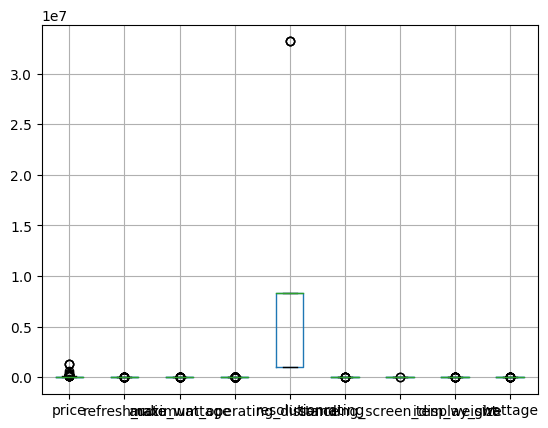

In [791]:
import seaborn as sns 
# df = df.loc[:,features_with_numerics[3:5]]
df.boxplot()

In [792]:
df.refresh_rate.describe()

count    321.000000
mean      63.395639
std       13.986462
min       50.000000
25%       60.000000
50%       60.000000
75%       60.000000
max      120.000000
Name: refresh_rate, dtype: float64

<AxesSubplot:ylabel='refresh_rate'>

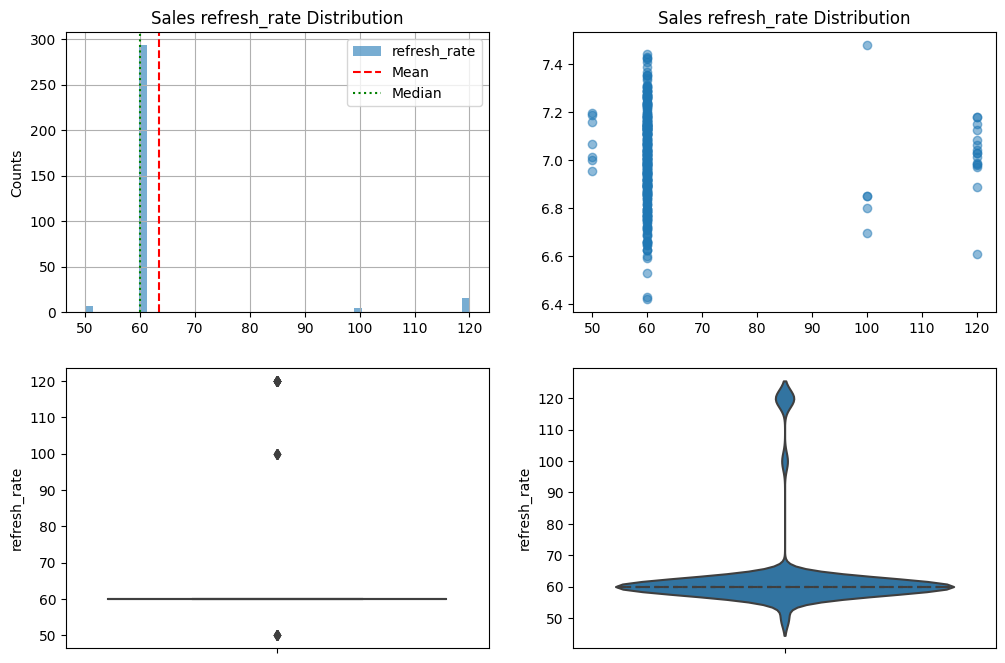

In [793]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
df['refresh_rate'].hist(bins=50, label='refresh_rate', alpha=0.6)
plt.axvline(np.mean(df['refresh_rate']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['refresh_rate']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Sales refresh_rate Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df['refresh_rate'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5)
plt.title("Sales refresh_rate Distribution")

plt.subplot(2, 2, 3)
sns.boxplot(y="refresh_rate", data=df)

plt.subplot(2, 2, 4)
sns.violinplot(y="refresh_rate", data=df, inner="quartile", bw=0.2)

In [794]:
from scipy.stats import norm
from scipy.stats import multivariate_normal as mn

def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

z-score of 2 corresponds to a prob of 0.27%
Rejection 21 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 16 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 16 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


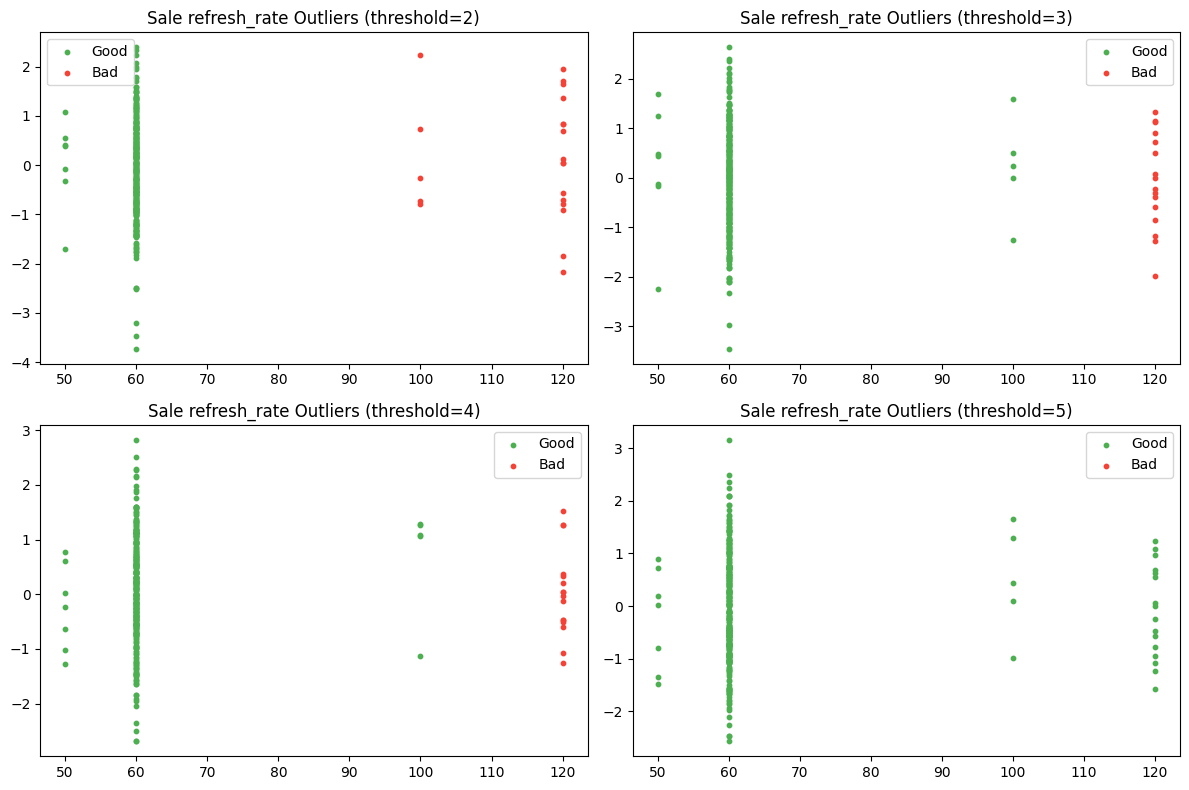

In [795]:
plt.figure(figsize=(12, 8))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=df.shape[0])
    good = z_score(df['refresh_rate'], threshold=threshold)
    plt.scatter(df['refresh_rate'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(df['refresh_rate'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"Sale refresh_rate Outliers (threshold={threshold})")

plt.tight_layout()

In [796]:
df.shape


(321, 16)

In [797]:
from scipy import stats

df = df[(np.abs(stats.zscore(df.select_dtypes(exclude='object'))) < 2).all(axis=1)]



In [798]:
df.shape

(264, 16)

In [799]:
df

,price,refresh_rate,display_type,audio_wattage,maximum_operating_distance,brand,resolution,rating,standing_screen_display_size,display_technology,item_weight,wattage,supports_bluetooth_technology,image_url,product,product_url
0,36499.0,60.0,LED,25.425993,8.812195,AmazonBasics,8.294400e+06,4.0,55.0,LED,10.30,60.0,Yes,https://m.media-amazon.com/images/I/41Y+SwHCJz...,AmazonBasics 139 cm (55 inches) 4K Ultra HD Sm...,https://amazon.in/gp/slredirect/picassoRedirec...
1,12490.0,60.0,LED,20.000000,8.812195,CROMA,5.691355e+06,4.4,32.0,LED,6.50,60.0,Yes,https://images-eu.ssl-images-amazon.com/images...,Croma 80 cm (32 Inches) HD Ready Certified And...,https://amazon.in/gp/slredirect/picassoRedirec...
2,14999.0,60.0,A+,20.000000,8.000000,Redmi,1.049088e+06,4.2,32.0,LED,3.92,50.0,Yes,https://images-eu.ssl-images-amazon.com/images...,Redmi 80 cm (32 inches) Android 11 Series HD R...,https://amazon.in/Redmi-inches-Ready-L32M6-RA-...
3,14999.0,60.0,LED,20.000000,9.000000,OnePlus,1.049088e+06,4.2,32.0,LED,3.50,20.0,Yes,https://m.media-amazon.com/images/I/41fVP+e7Cz...,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,https://amazon.in/OnePlus-inches-Ready-Android...
4,22999.0,60.0,Dynamic Backlight,20.000000,8.812195,MI,2.073600e+06,4.3,43.0,LED,5.48,75.0,Yes,https://images-eu.ssl-images-amazon.com/images...,Mi 108 cm (43 inches) Full HD Android LED TV 4...,https://amazon.in/inches-Full-Android-L43M6-IN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,23999.0,60.0,A+ | HDR10 | Wide Color Gamut | Micro Dimming,24.000000,8.812195,Acer,2.073600e+06,4.3,42.0,LED,6.25,24.0,Yes,https://images-eu.ssl-images-amazon.com/images...,Acer 106.8 cm (42 inches) P series Full HD And...,https://amazon.in/Acer-106-8-inches-Android-AR...
316,56999.0,60.0,A+ Grade,24.000000,8.812195,IFFALCON,8.294400e+06,4.3,65.0,LED,17.30,24.0,Yes,https://images-eu.ssl-images-amazon.com/images...,iFFALCON 164 cm (65 inches) 4K Ultra HD Certif...,https://amazon.in/iFFALCON-inches-Certified-An...
317,18490.0,50.0,IPS,10.000000,8.000000,LG,1.049088e+06,4.3,32.0,LED,19.10,10.0,No,https://images-eu.ssl-images-amazon.com/images...,LG 80 cms (32 Inches) HD Ready Smart IPS LED T...,https://amazon.in/LG-Inches-Ready-32LM560BPTC-...
319,8990.0,60.0,A+,20.000000,9.000000,Karbonn,1.049088e+06,4.4,32.0,LED,4.40,60.0,No,https://images-eu.ssl-images-amazon.com/images...,Karbonn 80 cm (32 Inches) Millennium Series HD...,https://amazon.in/gp/slredirect/picassoRedirec...
